<a href="https://colab.research.google.com/github/hodangtu01/HOMEWORK1---AI/blob/main/Cifar_100_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')


169001437/169001437 [==============================] - 8s 0us/step


In [4]:
print(x_train)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [195 205 193]
   [212 224 204]
   [182 194 167]]

  [[255 255 255]
   [254 254 254]
   [254 254 254]
   ...
   [170 176 150]
   [161 168 130]
   [146 154 113]]

  [[255 255 255]
   [254 254 254]
   [255 255 255]
   ...
   [189 199 169]
   [166 178 130]
   [121 133  87]]

  ...

  [[148 185  79]
   [142 182  57]
   [140 179  60]
   ...
   [ 30  17   1]
   [ 65  62  15]
   [ 76  77  20]]

  [[122 157  66]
   [120 155  58]
   [126 160  71]
   ...
   [ 22  16   3]
   [ 97 112  56]
   [141 161  87]]

  [[ 87 122  41]
   [ 88 122  39]
   [101 134  56]
   ...
   [ 34  36  10]
   [105 133  59]
   [138 173  79]]]


 [[[255 255 255]
   [253 253 253]
   [253 253 253]
   ...
   [253 253 253]
   [253 253 253]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [5]:
print(x_test)

[[[[199 215 249]
   [196 211 244]
   [195 210 243]
   ...
   [216 231 250]
   [217 231 250]
   [224 234 252]]

  [[197 210 239]
   [195 208 238]
   [195 210 240]
   ...
   [231 243 250]
   [233 243 250]
   [241 245 253]]

  [[222 226 246]
   [213 220 242]
   [209 219 243]
   ...
   [243 250 251]
   [244 249 251]
   [250 250 253]]

  ...

  [[ 72  73  99]
   [ 71  74 102]
   [ 74  78 108]
   ...
   [220 208 217]
   [183 168 181]
   [155 141 150]]

  [[ 72  75 104]
   [ 76  81 111]
   [ 84  89 122]
   ...
   [222 212 220]
   [187 174 192]
   [145 132 149]]

  [[ 80  85 118]
   [ 84  90 123]
   [ 85  92 127]
   ...
   [217 207 215]
   [207 194 211]
   [176 164 183]]]


 [[[113 130  98]
   [ 88 105  73]
   [ 72  89  58]
   ...
   [105 124  93]
   [ 86 106  74]
   [ 63  82  55]]

  [[ 95 113  80]
   [ 78  97  64]
   [ 62  80  49]
   ...
   [103 122  84]
   [ 89 109  70]
   [ 65  83  49]]

  [[ 79  97  62]
   [ 65  82  49]
   [ 52  67  37]
   ...
   [ 65  79  52]
   [ 62  79  51]
   [ 49  64

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

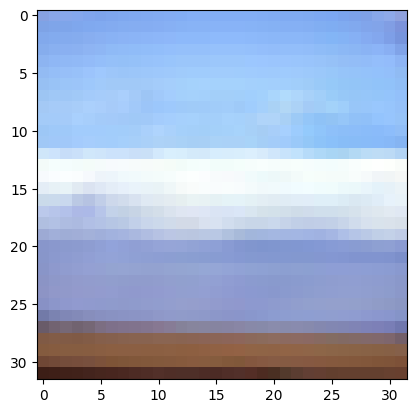

In [8]:
import matplotlib.pyplot as plt

hinh = x_train[300]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
#print('Ảnh:',x_train[45])

<function matplotlib.pyplot.show(close=None, block=None)>

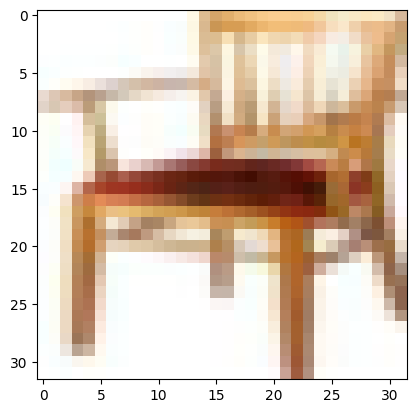

In [9]:
import matplotlib.pyplot as plt

hinh = x_test[30]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
#print('Ảnh:',x_train[45])

In [10]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

In [11]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))


Epoch 1/20
391/391 [==============================] - 192s 489ms/step - loss: 3.8481 - accuracy: 0.1199 - val_loss: 3.1742 - val_accuracy: 0.2466
Epoch 2/20
391/391 [==============================] - 182s 466ms/step - loss: 3.1281 - accuracy: 0.2389 - val_loss: 2.8096 - val_accuracy: 0.3093
Epoch 3/20
391/391 [==============================] - 188s 480ms/step - loss: 2.7846 - accuracy: 0.3021 - val_loss: 2.5716 - val_accuracy: 0.3547
Epoch 4/20
391/391 [==============================] - 191s 488ms/step - loss: 2.5289 - accuracy: 0.3543 - val_loss: 2.4854 - val_accuracy: 0.3723
Epoch 5/20
391/391 [==============================] - 188s 481ms/step - loss: 2.3366 - accuracy: 0.3956 - val_loss: 2.4095 - val_accuracy: 0.3899
Epoch 6/20
391/391 [==============================] - 190s 487ms/step - loss: 2.1629 - accuracy: 0.4309 - val_loss: 2.3668 - val_accuracy: 0.4009
Epoch 7/20
391/391 [==============================] - 189s 483ms/step - loss: 2.0066 - accuracy: 0.4630 - val_loss: 2.3128 -